# Welcome to WoMa

This notebook aims to cover the basic usage of WoMa. Let's get started!

Also see the `README.md` for more documentation.

## Contents:
1. Spherical planetary profiles      
2. Particle placement for spherical profiles
3. Spinning planetary profiles  
4. Particle placement for spinning profiles  

 ## 1. Spherical planetary profiles

First let's import WoMa, set some constants, and make a simple plotting function to display the planets we create:

In [14]:
import woma
import matplotlib.pyplot as plt

R_earth = 6.371e6   # m
M_earth = 5.972e24  # kg m^-3 

def plot_spherical_profiles(planet):    
    fig, ax = plt.subplots(2, 2, figsize=(8,8))
    
    ax[0, 0].plot(planet.A1_r / R_earth, planet.A1_rho)
    ax[0, 0].set_xlabel(r"Radius, $r$ $[R_\oplus]$")
    ax[0, 0].set_ylabel(r"Density, $\rho$ [kg m$^{-3}$]")
    ax[0, 0].set_yscale("log")
    ax[0, 0].set_xlim(0, None)
    
    ax[1, 0].plot(planet.A1_r / R_earth, planet.A1_m_enc / M_earth)
    ax[1, 0].set_xlabel(r"Radius, $r$ $[R_\oplus]$")
    ax[1, 0].set_ylabel(r"Enclosed Mass, $M_{<r}$ $[M_\oplus]$")
    ax[1, 0].set_xlim(0, None)
    ax[1, 0].set_ylim(0, None)
    
    ax[0, 1].plot(planet.A1_r / R_earth, planet.A1_P / 1e9)
    ax[0, 1].set_xlabel(r"Radius, $r$ $[R_\oplus]$")
    ax[0, 1].set_ylabel(r"Pressure, $P$ [Pa]")
    ax[0, 1].set_yscale("log")
    ax[0, 1].set_xlim(0, None)
    
    ax[1, 1].plot(planet.A1_r / R_earth, planet.A1_T)
    ax[1, 1].set_xlabel(r"Radius, $r$ $[R_\oplus]$")
    ax[1, 1].set_ylabel(r"Temperature, $T$ [K]")
    ax[1, 1].set_xlim(0, None)
    ax[1, 1].set_ylim(0, None)
    
    plt.tight_layout()
    plt.show()

### 1.1 One-layer planets

Let's start by building a simple, spherical, 1 layer planet.

WoMa provides many options for which inputs you provide and which are calculated. We'll cover other options later, or see `README.md` for the full documentation.

For any planet we want to build, we first need to specify:
- The equation of state (EoS) for every material: e.g. Tillotson basalt. 
- A temperature--density relation for every material: e.g. a power-law $T\propto\rho^\alpha$ with e.g. $\alpha=2$ (or $\alpha=0$ for isothermal).
- Two of the following three values at the surface of the planet: pressure $P_{\rm s}$, temperature $T_{\rm s}$, and density $\rho_{\rm s}$. e.g. $P_{\rm s}=10^5\, \rm Pa$ and $T_{\rm s}=1000\, \rm K$.

(Note that arrays in WoMa are explicitly labelled with a prefix `A1_`, or `An_` for an `n`-dimensional array.)

In [ ]:
one_layer_planet = woma.Planet(
    name            = "my_first_planet",
    A1_mat_layer    = ["Til_basalt"],
    A1_T_rho_type   = ["power=2"],
    P_s             = 1e5,
    T_s             = 500,
)

For spherical 1 layer planets we can specify either the total radius `R` or the total mass `M` of the planet, then WoMa will find the value for other such that we get a valid planet in hydrostatic equilibrium.

Let's set our planet's radius to $1~R_\oplus$. WoMa also needs a rough value for the maximum mass `M_max`, let's say a generous $2~M_\oplus$. 

(We could have set these along with the other parameters in the previous cell.)

In [ ]:
one_layer_planet.R = R_earth
one_layer_planet.M_max = 2 * M_earth

We now select the appropiate method and the planet profiles get made.

In this case, we are generating (`gen_prof`) a one layer planet (`L1`) and need to find the mass (`find_M`) for our chosen radius (`given_R`):

In [ ]:
one_layer_planet.gen_prof_L1_find_M_given_R()

We see from the printed output that the mass of our planet is about $\tfrac{2}{3}~M_\oplus$, along with other information.

Let's plot the resulting profiles:

In [ ]:
plot_spherical_profiles(one_layer_planet)

As mentioned above, we could instead set the total mass `M` to derive the radius. 

Let's also try an isothermal temperature relation.

In [ ]:
one_layer_planet = woma.Planet(
    name            = "my_second_planet",
    A1_mat_layer    = ["Til_basalt"],
    A1_T_rho_type   = ["power=0"],
    P_s             = 1e5,
    T_s             = 500,
    M               = M_earth,
    R_max           = 2 * R_earth,
)

# Generate the profiles
one_layer_planet.gen_prof_L1_find_R_given_M()

# Plot the results
plot_spherical_profiles(one_layer_planet)

### 1.2 Two-layer planets

Let's move on to make some 2 layer planets. 

We'll also try some more realistic ANEOS equations of state for an Earth-like core and mantle, with adiabatic temperature--density relations:

In [ ]:
two_layer_planet = woma.Planet(
    name            = "hello_earth",
    A1_mat_layer    = ["ANEOS_Fe85Si15", "ANEOS_forsterite"],
    A1_T_rho_type   = ["adiabatic", "adiabatic"],
    P_s             = 1e5,
    T_s             = 1000,
)

For 2 layer planets we have many more options for which properties of our planet we choose and which unknowns are derived. 

For example, we can set the mass of each layer, `A1_M_layer`, and get WoMa to find the radii of the boundary and the outer edge, `A1_R_layer`. As before, we also need to give a maximum possible radius.

In [ ]:
two_layer_planet.A1_M_layer = [0.3 * M_earth, 0.7 * M_earth]
two_layer_planet.R_max = 2 * R_earth

# Generate the profiles
two_layer_planet.gen_prof_L2_find_R1_R_given_M1_M2()

# Plot the results
plot_spherical_profiles(two_layer_planet)

Or, we could set the total mass `M` and the radius `R`, and get WoMa to find the boundary radius. 

Let's try a weird mix of SESAME and Tillotson materials with an adiabatic mantle and a power-law core:

In [ ]:
two_layer_planet = woma.Planet(
    A1_mat_layer    = ["Til_iron", "SESAME_basalt"],
    A1_T_rho_type   = ["power=0.5", "adiabatic"],
    P_s             = 1e5,
    T_s             = 1000,
    M               = M_earth,
    A1_R_layer      = [None, R_earth],
)

# Generate the profiles
two_layer_planet.gen_prof_L2_find_R1_given_R_M()

# Plot the results
plot_spherical_profiles(two_layer_planet)

### 1.3 Three-layer planets

With 3 layers there are a huge number of possible inputs and unknowns, several but not all of which are available in WoMa. Some of these require repeated iterations over multiple variables, so can take several minutes.

Further developments are ongoing, so if you have a particular choice of parameters that you'd like to set and/or determine then please let us know! 

For example, let's create an ice giant by setting the total mass, total radius, and the moment of intertia factor. ###not working

In [10]:
three_layer_planet = woma.Planet(
    A1_mat_layer    = ["HM80_rock", "HM80_ice", "HM80_HHe"],
    A1_T_rho_type   = ["power=0", "power=0.9", "adiabatic"],
    P_s             = 1e3,
    T_s             = 100,
    M               = 17 * M_earth,
    A1_R_layer      = [None, None, 4 * R_earth],
    I_MR2           = 0.2,
    num_attempt     = 5, ###
    num_attempt_2   = 5, ###
)

# Generate the profiles
three_layer_planet.gen_prof_L3_find_R1_R2_given_R_M_I()

# Plot the results
plot_spherical_profiles(three_layer_planet)

Finding R1, R2 given R, M, I_MR2:   0%|          | 0/5 [00:00<?, ?it/s]


Exception: A planet made of layer 1 and layer 2 materials excess mass.
Try decreasing the mass, decreasing R1 or increasing R.


Let's make one final Earth-like (ish) planet and add an atmosphere on top of the inner two layers, choosing their masses. The atmosphere's mass will depend primarily on the pressure at its base.

In this case, the input "surface" parameters set the conditions at the base of the atmosphere. ### to be changed? ###

We also need to set the minimum density at which our atmosphere will stop, since in this case the third layer profiles are integrated outwards.

Finding R1 and R given M1, M2: 100%|██████████| 5/5 [02:18<00:00, 27.79s/it]


Tweaking M to avoid peaks at the center of the planet...
Adding the third layer on top...
Planet "None": 
    M            = 5.9779e+24  kg  = 1.0009  M_earth
    R            = 6.7922e+06  m  = 1.0661  R_earth
    mat          = ["ANEOS_Fe85Si15", "ANEOS_forsterite", "SESAME_N2"] 
    mat_id       = [402, 400, 305] 
    T_rho_type   = ["adiabatic", "adiabatic", "power=0"] 
    R_layer      = [0.50342, 1.0343, 1.0661]  R_earth
    M_layer      = [0.26437, 0.73554, 0.0010149]  M_earth
    M_frac_layer = [0.26412, 0.73486, 0.0010139]  M_tot
    idx_layer    = [4867, 9999, 10307] 
    P_s          = 3.0008e+05  Pa
    T_s          = 1000  K
    rho_s        = 1.011  kg m^-3
    P_2          = 1e+08  Pa
    T_2          = 1000  K
    rho_2        = 3167.4  kg m^-
    P_1          = 1.3892e+11  Pa
    T_1          = 1409.5  K
    rho_1        = 10536  kg m^-3
    P_0          = 3.409e+11  Pa
    T_0          = 1803.6  K
    rho_0        = 12647  kg m^-3
    I_MR2        = 0.31326  M_tot*R_t

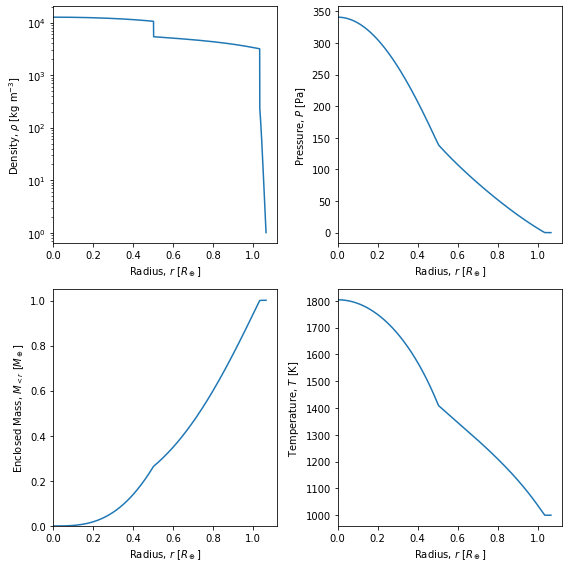

In [13]:
three_layer_planet = woma.Planet(
    A1_mat_layer    = ["ANEOS_Fe85Si15", "ANEOS_forsterite", "SESAME_N2"],
    A1_T_rho_type   = ["adiabatic", "adiabatic", "power=0"],
    A1_M_layer      = [0.3 * M_earth, 0.7 * M_earth, None],
    P_s             = 1e8,
    T_s             = 1000,
    rho_min         = 1,
    R_max           = 3 * R_earth,
    num_attempt     = 5, ###
)

# Generate the profiles
three_layer_planet.gen_prof_L3_find_R1_R2_given_M1_M2_add_L3()

# Plot the results
plot_spherical_profiles(three_layer_planet)

## 2. Particle placement (e.g. for SPH) for spherical profiles

We use the SEA algorithm ([Kegerreis et al. 2019](https://doi.org/10.1093/mnras/stz1606)) to place particles to precisely match the spherical profile densities.

Let's use one of the 2 layer planets we made above as an example:

In [ ]:
import woma
import seagen

R_earth = 6371000
M_earth = 5.972E24

l2_test = woma.Planet(
    A1_mat_layer    = ['SESAME_iron', 'SESAME_basalt'],
    A1_T_rho_type   = ['power=0.', 'adiabatic'],
    P_s             = 1e5,
    T_s             = 300,
    M               = M_earth,
    A1_R_layer      = [None, R_earth]               # list with boundary and total radius
    )

l2_test.gen_prof_L2_find_R1_given_R_M()

In [ ]:
N = 1e5 # Number of particles
particles = woma.ParticleSet(l2_test, N)

All information about the particle placement can be found in the attributes of `particles`. See `main.py` for all the detals.

In [ ]:
print(woma.ParticleSet.__doc__)

## 3. Spinning planetary profiles

A spinning planetary profile can be described by its equatorial and polar density profiles. This is equivalent to say our planet is a set of constant density oblate spheroids. For full details see [Ruiz-Bonilla et al. 2020](fgdfgdfg).

The easiest way to construct a spheroidal planet in WoMa is starting from a spherical one. Let us construct an arbitrary one:

In [ ]:
def plot_spin_profile(spin_planet):
    
    sp = spin_planet
    
    fig, ax = plt.subplots(1,2, figsize=(12,6))
    ax[0].scatter(sp.A1_r/R_earth, sp.A1_rho, label = 'original', s = 0.5)
    ax[0].scatter(sp.A1_r_equator/R_earth, sp.A1_rho_equator, label = 'equatorial profile', s = 1)
    ax[0].scatter(sp.A1_r_pole/R_earth, sp.A1_rho_pole, label = 'polar profile', s = 1)
    ax[0].set_xlabel(r"$r$ [$R_{earth}$]")
    ax[0].set_ylabel(r"$\rho$ [$kg/m^3$]")
    ax[0].legend()
    
    
    r_array_coarse = np.linspace(0, np.max(sp.A1_r_equator), 200)
    z_array_coarse = np.linspace(0, np.max(sp.A1_r_pole), 200)
    rho_grid = np.zeros((r_array_coarse.shape[0], z_array_coarse.shape[0]))
    for i in range(rho_grid.shape[0]):
        radius = r_array_coarse[i]
        for j in range(rho_grid.shape[1]):
            z = z_array_coarse[j]
            rho_grid[i,j] = woma.us.rho_rz(radius, z,
                                      sp.A1_r_equator, sp.A1_rho_equator,
                                      sp.A1_r_pole, sp.A1_rho_pole)
    
    X, Y = np.meshgrid(r_array_coarse/R_earth, z_array_coarse/R_earth)
    Z = rho_grid.T
    levels = np.arange(1000, 15000, 1000)
    ax[1].set_aspect('equal')
    CS = plt.contour(X, Y, Z, levels = levels)
    ax[1].clabel(CS, inline=1, fontsize=10)
    ax[1].set_xlabel(r"$r$ [$R_{earth}$]")
    ax[1].set_ylabel(r"$z$ [$R_{earth}$]")
    ax[1].set_title('Density (Kg/m^3)')
        
    plt.tight_layout()
    plt.show()

In [ ]:
import woma
import seagen
import matplotlib.pyplot as plt
import numpy as np

R_earth = 6371000
M_earth = 5.972E24

l2_test = woma.Planet(
    A1_mat_layer    = ['Til_iron', 'Til_granite'],
    A1_T_rho_type   = ['power=0.1', 'power=0.1'],
    P_s             = 1e5,
    T_s             = 3000,
    M               = M_earth,
    A1_R_layer      = [0.5*R_earth, None],               # list with boundary and total radius
    R_max           = 2*R_earth
    )

l2_test.gen_prof_L2_find_R_given_M_R1()

We now, just simply use the `SpinPlanet` class:

In [ ]:
my_spinning_planet = woma.SpinPlanet(
    planet = l2_test,
    Tw     = 3  # hours
    )

my_spinning_planet.spin()

plot_spin_profile(my_spinning_planet)

The code will check for the minimum period available for the planet described automatically.

Note the units of periods are set in hours, the rest of units are SI.

Let's compute the spinning planetary profile of the planet with its minimum period:

In [ ]:
l2_test_spin = woma.SpinPlanet(
    planet  = l2_test,
    R_e_max = 2.3*R_earth,
    R_p_max = 1.3*R_earth,
    Tw      = 0.001     # hours
    )

l2_test_spin.spin()

plot_spin_profile(l2_test_spin)

Note the `spin` method does not have mass conservation. In order to have it, use `spin_planet_fix_M`.

In [ ]:
l2_test_spin = woma.spin_planet_fix_M(planet=l2_test, Tw=10,
                                      R_e_max=1.5*R_earth, R_p_max=1.1*R_earth,
                                      max_iter_1=5, max_iter_2=5)

## 4. Particle placement for spinning planetary profiles

We place particles for the example used above (see [Ruiz-Bonilla et al. 2020](fgdfgdfg) for full details):

In [ ]:
N         = 1e5 # Number of particles
particles = woma.ParticleSet(l2_test_spin, N)